In [ ]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

rc_params = {
    'mathtext.fontset': 'cm',      # Set default mathtext font
    'font.family': 'STIXGeneral',  # Set default font family
    #'xtick.direction': 'in',       # Set default xtickdirecion
    #'xtick.minor.visible': False,  # visibility of minor ticks on x-axis
    #'ytick.direction': 'in',       # Set default ytickdirecion
    #'ytick.minor.visible': False,  # visibility of minor ticks on y-axis
}

matplotlib.rcParams.update(rc_params)

In [ ]:
object_table_path = '/content/drive/MyDrive/01_Supernovae_ThesisSteve/Data/object_ALeRCExWiserep20240630_20240703.pkl'
object_table = pd.read_pickle(object_table_path)
object_table.head()

,oid,source_id,true_label,redshift,firstmjd,Av_MW
0,ZTF22abqtedd,SN 1990E,SN IIP,0.00414,60257.273299,0.0664
1,ZTF24aaekmnz,SN 2024yr,SN II,0.02,60351.498808,0.5448
2,ZTF24aabvtdh,SN 2024yq,SN Ia,0.04,60324.494931,0.1316
3,ZTF24aabplhb,SN 2024ym,SN Ia,0.038,60322.398276,0.0707
4,ZTF24aabuisb,2024xx,SN Ia,0.05437,60322.324630,0.0599


In [ ]:
print('Number of different elements in Object table:')
print(object_table.oid.nunique())

Number of different elements in Object table:
9724


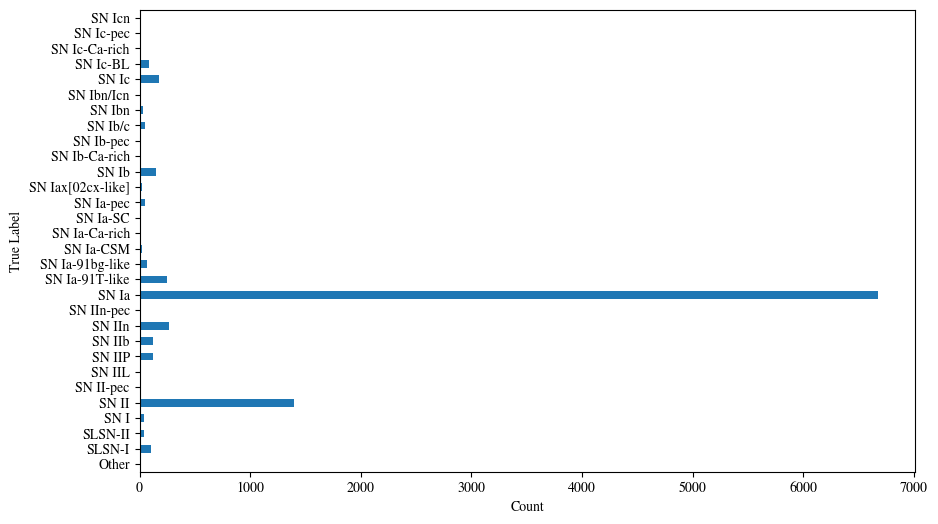

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = object_table.groupby('true_label').size().plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()

In [ ]:
spectra_alercexwiserep_path = '/content/drive/MyDrive/01_Supernovae_ThesisSteve/Data/spectra_ALeRCE20240801_x_wisrep_20240622.pkl'
spectra_alercexwiserep = pd.read_pickle(spectra_alercexwiserep_path)
spectra_alercexwiserep.columns, spectra_alercexwiserep.head()

(Index(['oid', 'snname', 'instrument', 'mjd', 'lambda_grid_min',
        'lambda_grid_max', 'nlambda_grid', 'lambda_data_min', 'lambda_data_max',
        'flux_lambda', 'flux_lambda_smooth', 'e_flux_lambda'],
       dtype='object'),
    oid       snname     instrument           mjd  lambda_grid_min  \
 0  NaN    SN2022pru   Lick-3m_KAST  59788.215972          3206.34   
 1  NaN    SN2022ytx       LT_SPRAT  59886.979942          3206.34   
 2  NaN    SN2022ytx       LT_SPRAT  59907.898866          3206.34   
 3  NaN  SNLS-07D3do  Gemini-N_GMOS  54200.000000          3206.34   
 4  NaN  SNLS-07D3do  Gemini-N_GMOS  54200.000000          3206.34   
 
    lambda_grid_max  nlambda_grid  lambda_data_min  lambda_data_max  \
 0         10915.01          1838      3504.527001     10393.131809   
 1         10915.01          1838      4047.600000      7994.400000   
 2         10915.01          1838      4066.000000      7994.400000   
 3         10915.01          1838      5104.440000      9352.

Text(0, 0.5, 'Flux [erg/s/cm2/Angstrom]')

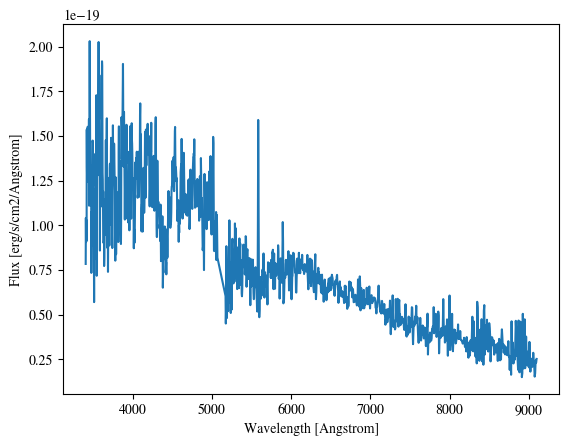

In [ ]:
idx = np.random.randint(spectra_alercexwiserep.shape[0])
spectrum = spectra_alercexwiserep.iloc[idx]
wave_range = np.logspace(np.log10(spectrum.lambda_grid_min), np.log10(spectrum.lambda_grid_max), spectrum.nlambda_grid)
plt.plot(wave_range, spectrum.flux_lambda)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux [erg/s/cm2/Angstrom]')

In [ ]:
print('Total number of spectra in SpectraxWisrep table:')
print(spectra_alercexwiserep.shape[0])
print()
print('Number of different elements in SpectraxWisrep table:')
print(spectra_alercexwiserep.snname.nunique())

Total number of spectra in SpectraxWisrep table:
25953

Number of different elements in SpectraxWisrep table:
16281


In [ ]:
def crossmatch_object_alerce(alerce_lc_table: pd.DataFrame, object_table: pd.DataFrame) -> pd.DataFrame:
    lightcurves = pd.merge(left=alerce_lc_table, right=object_table,
                       on='oid')
    return lightcurves
spectra = crossmatch_object_alerce(spectra_alercexwiserep, object_table)
spectra.head()

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,flux_lambda_smooth,e_flux_lambda,source_id,true_label,redshift,firstmjd,Av_MW
0,ZTF18aahrzkb,SN2020xqj,P200_DBSP,59164.000000,3206.34,10915.01,1838,3200.560090,9998.678015,"[11.332792501924354, -26.531666822893794, 20.6...","[14.01389829362846, 9.526431984804509, 8.27339...","[24.777313578764556, 24.80893509679184, 25.746...",SN 2020xqj,SN II,0.01,59153.493183,0.0528
1,ZTF19abdyawn,SN2019kyy,P60_SEDM,58682.414919,3206.34,10915.01,1838,3776.700000,9223.300000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",SN 2019kyy,SN Ia,0.041,58668.363171,0.8485
2,ZTF20actqnhg,SN2020aaxf,Other_Other,59190.058461,3206.34,10915.01,1838,3600.510000,7460.630000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.1768528473602096e-16, 3.037778007972252e-16...",SN 2020aaxf,SN IIb,0.031,59178.482199,0.2085
3,ZTF19abzsjpn,SN2019qul,P60_SEDM,58750.348681,3206.34,10915.01,1838,3776.700000,9223.300000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",SN 2019qul,SN Ia,0.07,58746.379132,0.0723
4,ZTF20acbekkx,SN2020tyk,MMT_BINOSPEC,59140.000000,3206.34,10915.01,1838,3825.044262,9211.714889,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.8542888641342434e-17, 2.0443041639755383e-1...",SN 2020tyk,SN IIn,0.088,59109.374074,0.1197


In [ ]:
print('Total number of spectra in spectra table:')
print(spectra.shape[0])
print()
print('Number of different elements in spectra table:')
print(spectra.oid.nunique())

Total number of spectra in spectra table:
13162

Number of different elements in spectra table:
9264


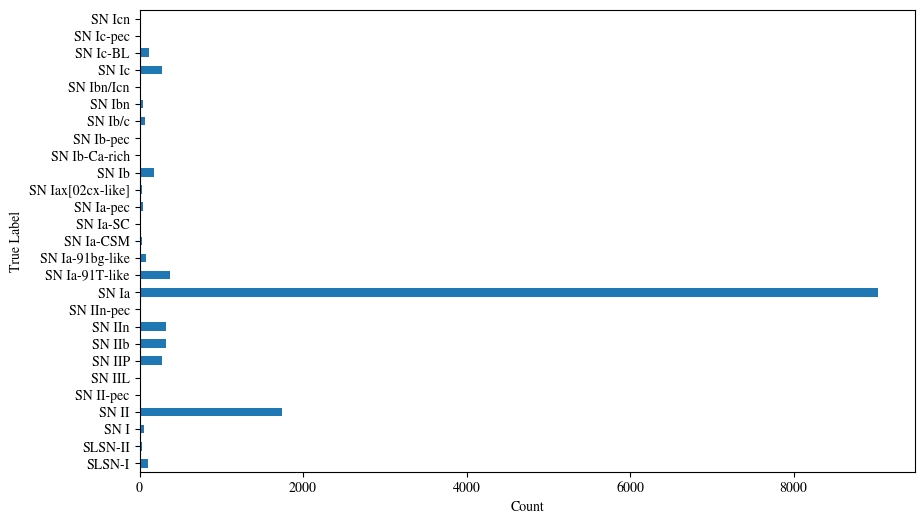

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = spectra.groupby('true_label').size().plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()

In [ ]:
!python -mpip install 'light-curve[full]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 19.2 MB/s eta 0:00:00


In [ ]:
import light_curve as lc
import numpy as np

In [ ]:
help(lc.bolometric)

Help on module light_curve.light_curve_py.features.rainbow.bolometric in light_curve.light_curve_py.features.rainbow:

NAME
    light_curve.light_curve_py.features.rainbow.bolometric

CLASSES
    builtins.object
        BaseBolometricTerm
            BazinBolometricTerm
            DoublexpBolometricTerm
            LinexpBolometricTerm
            SigmoidBolometricTerm
    
    class BaseBolometricTerm(builtins.object)
     |  BaseBolometricTerm() -> None
     |  
     |  Bolometric term for the Rainbow
     |  
     |  Methods defined here:
     |  
     |  __eq__(self, other)
     |      Return self==value.
     |  
     |  __init__(self) -> None
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  ----------------------------------------------------------------------
     |  Static methods defined here:
     |  
     |  initial_guesses(t, m, sigma, band) -> Dict[str, float]
     | 

In [ ]:
# Time values can be non-evenly separated but must be an ascending array
n = 101
t = np.linspace(0.0, 1.0, n)
perfect_m = 1e3 * t + 1e2
err = np.sqrt(perfect_m)
m = perfect_m + np.random.normal(0, err)

# Half-amplitude of magnitude
amplitude = lc.Amplitude()
# Fraction of points beyond standard deviations from mean
beyond_std = lc.BeyondNStd(nstd=1)
# Slope, its error and reduced chi^2 of linear fit
linear_fit = lc.LinearFit()
# Feature extractor, it will evaluate all features in more efficient way
extractor = lc.Extractor(amplitude, beyond_std, linear_fit)

# Array with all 5 extracted features
result = extractor(t, m, err, sorted=True, check=False)

print('\n'.join(f"{name} = {value:.2f}" for name, value in zip(extractor.names, result)))

# Run in parallel for multiple light curves:
results = amplitude.many(
    [(t[:i], m[:i], err[:i]) for i in range(n // 2, n)],
    n_jobs=-1,
    sorted=True,
    check=False,
)
print("Amplitude of amplitude is {:.2f}".format(np.ptp(results)))

amplitude = 488.27
beyond_1_std = 0.42
linear_fit_slope = 997.04
linear_fit_slope_sigma = 7.25
linear_fit_reduced_chi2 = 0.80
Amplitude of amplitude is 228.41


In [ ]:
features = [x for x in dir(lc) if hasattr(getattr(lc, x), "names")]
for i in range(len(features) // 5 + 1):
    print(features[i * 5: (i + 1) * 5])

['Amplitude', 'AndersonDarlingNormal', 'BazinFit', 'BeyondNStd', 'Bins']
['Cusum', 'Duration', 'Eta', 'EtaE', 'ExcessVariance']
['FluxNNotDetBeforeFd', 'InterPercentileRange', 'JSONDeserializedFeature', 'Kurtosis', 'LinearFit']
['LinearTrend', 'LinexpFit', 'MagnitudeNNotDetBeforeFd', 'MagnitudePercentageRatio', 'MaximumSlope']
['MaximumTimeInterval', 'Mean', 'MeanVariance', 'Median', 'MedianAbsoluteDeviation']
['MedianBufferRangePercentage', 'MinimumTimeInterval', 'ObservationCount', 'OtsuSplit', 'PercentAmplitude']
['PercentDifferenceMagnitudePercentile', 'Periodogram', 'RainbowFit', 'ReducedChi2', 'Roms']
['Skew', 'StandardDeviation', 'StetsonK', 'TimeMean', 'TimeStandardDeviation']
['VillarFit', 'WeightedMean']


In [ ]:
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][:5])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][5:10])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][10:15])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][15:20])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][20:25])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][25:30])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][30:35])
print([x for x in dir(lc) if hasattr(getattr(lc, x), "names")][35:])

['Amplitude', 'AndersonDarlingNormal', 'BazinFit', 'BeyondNStd', 'Bins']
['Cusum', 'Duration', 'Eta', 'EtaE', 'ExcessVariance']
['FluxNNotDetBeforeFd', 'InterPercentileRange', 'JSONDeserializedFeature', 'Kurtosis', 'LinearFit']
['LinearTrend', 'LinexpFit', 'MagnitudeNNotDetBeforeFd', 'MagnitudePercentageRatio', 'MaximumSlope']
['MaximumTimeInterval', 'Mean', 'MeanVariance', 'Median', 'MedianAbsoluteDeviation']
['MedianBufferRangePercentage', 'MinimumTimeInterval', 'ObservationCount', 'OtsuSplit', 'PercentAmplitude']
['PercentDifferenceMagnitudePercentile', 'Periodogram', 'RainbowFit', 'ReducedChi2', 'Roms']
['Skew', 'StandardDeviation', 'StetsonK', 'TimeMean', 'TimeStandardDeviation', 'VillarFit', 'WeightedMean']


In [ ]:
import numpy as np
from light_curve.light_curve_py import RainbowFit


def BlackBody_nu(wave_aa, T):
    """Black-body spectral model"""

    CSPEED = 3e10

    nu = CSPEED / (wave_aa * 1e-8)
    return 2 * 6.626e-27 * nu ** 3 / CSPEED ** 2 / np.expm1(6.626e-27 * nu / (1.38e-16 * T))


# Effective wavelengths in Angstrom
band_wave_aa = {"g": 4770.0, "r": 6231.0, "i": 7625.0, "z": 9134.0}

# Parameter values
reference_time = 60000.0  # time close to the peak time
# Bolometric flux model parameters
amplitude = 1.0  # bolometric flux semiamplitude, arbitrary (non-spectral) flux/luminosity units
rise_time = 5.0  # exponential growth timescale, days
fall_time = 30.0  # exponential decay timescale, days
# Temperature model parameters
Tmin = 5e3  # temperature on +infinite time, kelvins
delta_T = 10e3  # (Tmin + delta_T) is temperature on -infinite time, kelvins
k_sig = 4.0  # temperature evolution timescale, days

t = np.sort(np.random.uniform(low=reference_time - 3 * rise_time, high=reference_time + 3 * fall_time, size=1000))
band = np.random.choice(list(band_wave_aa), size=len(t))
waves = np.array([band_wave_aa[b] for b in band])

# Temperature evolution is a sigmoid function
temp = Tmin + delta_T / (1.0 + np.exp((t - reference_time) / k_sig))
# Bolometric flux evolution is the Bazin function
lum = amplitude * np.exp(-(t - reference_time) / fall_time) / (
        1.0 + np.exp(-(t - reference_time) / rise_time))

# Spectral flux density for each given pair of time and passband
flux = np.pi * BlackBody_nu(waves, temp) / (5.67e-5 * temp ** 4) * lum
# S/N = 5 for minimum flux, scale for Poisson noise
flux_err = np.sqrt(flux * np.min(flux) / 5.0)
flux += np.random.normal(0.0, flux_err)

feature = RainbowFit.from_angstrom(band_wave_aa, with_baseline=False)
values = feature(t, flux, sigma=flux_err, band=band)
print(dict(zip(feature.names, values)))
print(f"Goodness of fit: {values[-1]}")

{'reference_time': 59999.53249260742, 'amplitude': 1.5024966095205689e-15, 'rise_time': 6.006140070623101, 'fall_time': 29.7080602136364, 'Tmin': 5004.566495354728, 'Tmax': 16283.08283135502, 't_color': 4.0627991475796135}
Goodness of fit: 0.5141124886936399


In [ ]:
help(RainbowFit.model)

Help on function model in module light_curve.light_curve_py.features.rainbow._base:

model(self, t, band, *params)
    Model function for the fit.



In [ ]:
help(RainbowFit.model(t, band))

Help on class RainbowFit in module light_curve.light_curve_py.features.rainbow.generic:

class RainbowFit(light_curve.light_curve_py.features.rainbow._base.BaseRainbowFit)
 |  RainbowFit(band_wave_cm: Dict[str, float], *, with_baseline: bool = True, fail_on_divergence: bool = True, bolometric: Union[str, light_curve.light_curve_py.features.rainbow.bolometric.BaseBolometricTerm] = 'bazin', temperature: Union[str, light_curve.light_curve_py.features.rainbow.temperature.BaseTemperatureTerm] = 'sigmoid') -> None
 |  
 |  Multiband blackbody fit to the light curve using functions to be chosen by the user
 |  Note, that `m` and corresponded `sigma` are assumed to be flux densities.
 |  Based on Russeil et al. 2023, arXiv:2310.02916.
 |  
 |  Parameters
 |  ----------
 |  band_wave_cm : dict
 |      Dictionary of band names and their effective wavelengths in cm.
 |  with_baseline : bool, optional
 |      Whether to include an offset in the fit, individual for each band.
 |      If it is true,

In [ ]:
set(waves)

{4770.0, 6231.0, 7625.0, 9134.0}

In [ ]:
waves.shape, waves.min(), waves.max()

((1000,), 4770.0, 9134.0)

In [ ]:
list(band_wave_aa)

['g', 'r', 'i', 'z']

In [ ]:
print(f"Shapes -> t: {t.shape}, waves: {waves.shape}, temp: {temp.shape}, lum: {lum.shape}")

Shapes -> t: (1000,), waves: (1000,), temp: (1000,), lum: (1000,)


In [ ]:
print(t.size)

1000


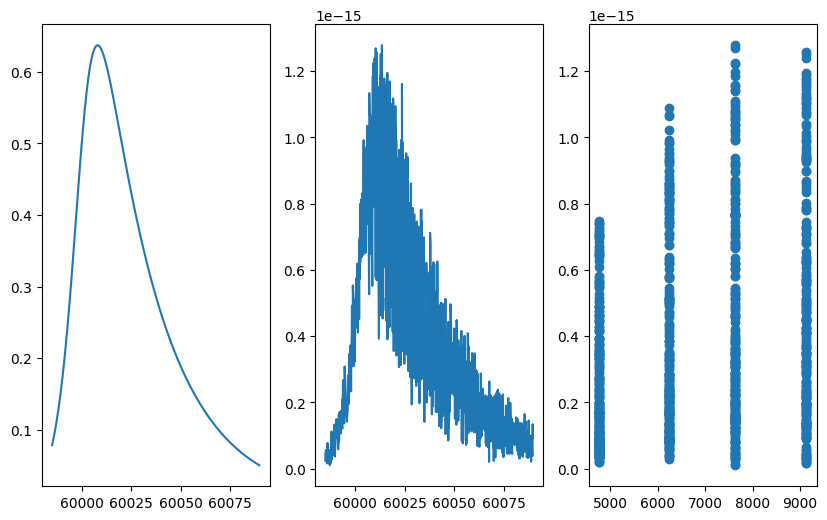

In [ ]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(10, 6))
ax0 = ax0.plot(t, lum, label='lum')
ax1 = ax1.plot(t, flux, label='flux')
ax2 = ax2.plot(waves, flux, 'o',label='flux_err')
plt.show()

In [ ]:
from astropy.table import Table


# Datos de ejemplo: tiempos, bandas y flujos observados
t = [1, 2, 3, 4]  # tiempos en días
band = ["g", "r", "i", "z"]  # bandas observadas
flux = [1.0, 0.8, 0.5, 0.3]  # flujo en unidades arbitrarias
flux_err = [0.1, 0.1, 0.1, 0.1]  # error del flujo

# Crear un objeto Rainbow con los datos
table = Table({"time": t, "band": band, "flux": flux, "flux_err": flux_err})
rainbow = lc.Rainbow(table)

# Interpolación para obtener el espectro en un tiempo específico
spectrum = rainbow.get_spectrum(time=2.5)  # Espectro en t=2.5 días

# Visualizar el espectro
spectrum.plot()

AttributeError: module 'light_curve' has no attribute 'Rainbow'

In [ ]:
from light_curve.light_curve_py import RainbowFit

# Definir los filtros en longitud de onda efectiva (en Angstrom)
band_wave_aa = {"g": 4770.0, "r": 6231.0, "i": 7625.0, "z": 9134.0}

# Crear un modelo de ajuste de espectros sin baseline
feature = RainbowFit.from_angstrom(band_wave_aa, with_baseline=False)

# Aplicar el modelo a los datos
values = feature(t, flux, sigma=flux_err, band=band)

# Imprimir resultados del ajuste
print(dict(zip(feature.names, values)))

/usr/local/lib/python3.11/dist-packages/light_curve/light_curve_py/warnings.py:19: ExperimentalWarning: Function light_curve.light_curve_py.features.rainbow.generic.RainbowFit is experimental and may cause any kind of troubles
  warn_experimental(message)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/light_curve/light_curve_py/features/rainbow/_base.py:215: RuntimeWarning: divide by zero encountered in divide
  (2 * planck_constant / speed_of_light**2) * nu**3 / np.expm1(planck_constant * nu / (boltzman_constant * T))
/usr/local/lib/python3.11/dist-packages/light_curve/light_curve_py/features/rainbow/_base.py:231: RuntimeWarning: invalid value encountered in divide
  planck

RuntimeError: Fitting failed

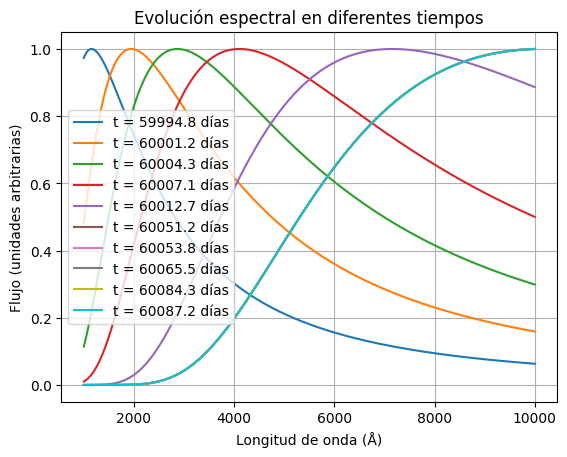

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as astro_constants

class Rainbow():

    def __init__(self, wave_aa, time, reference_time,rise_time, fall_time,
                 amplitude, Tmin, delta_T, k_sig):

        self.wave_aa = wave_aa
        self.time = time
        self.reference_time = reference_time
        self.rise_time = rise_time
        self.fall_time = fall_time
        self.amplitude = amplitude
        self.Tmin = Tmin
        self.delta_T = delta_T
        self.k_sig = k_sig

    def temperature(self, Tmin, time, reference_time, delta_T, k_sig):

        num = delta_T
        den = 1.0 + np.exp((time - reference_time) / k_sig)

        return Tmin + num / den

    def bolometric_flux(self, time, reference_time, amplitude, rise_time, fall_time):

        num = np.exp(-(time - reference_time) / fall_time)
        den = 1.0 + np.exp((time - reference_time) / rise_time)

        return amplitude * num / den

    def blackbody_nu(self,wave_aa, T):
        """ Black-body spectral model
        Params
        -------
        - wave_aa: wavelength list in Angstron units
        - T: Temperature

        Returns
        -------
        - Spectral flux density like a BlackBody
        """

        CSPEED  = astro_constants.c.to('cm s-1').value    # [cm s-1]
        HPLANCK = astro_constants.h.to('erg s').value     # [erg s]
        KBOLTZ  = astro_constants.k_B.to('erg K-1').value # [erg K-1]

        # Obtain the frequency in [cm] units
        nu = CSPEED / (wave_aa * 1e-8)

        # Black body radiation in frequency
        # Note: expm1 = exp(x) - 1
        B_nu = (2*HPLANCK*nu**3/CSPEED**2)/np.expm1(HPLANCK*nu/(KBOLTZ*T))

        return B_nu

    def spectral_flux_density(self, band_wave_aa):
        """Compute the observed spectral
        flux density per unit frequency nu

        Params
        -------
        band_wave_aa: float or array-like
            Wavelength(s) in Angstrom.

        Returns
        -------
        - Spectral flux density like a BlackBody
        """

        SSTEFANBOLTZ = astro_constants.sigma_sb.to('erg s-1 cm-2 K-4').value # [erg s-1 cm-2 K-4]

        T     = self.temperature(self.Tmin, self.time, self.reference_time,
                                 self.delta_T, self.k_sig)
        F_bol = self.bolometric_flux(self.time, self.reference_time, self.amplitude,
                                     self.rise_time, self.fall_time)
        Flux = np.pi * self.blackbody_nu(band_wave_aa, T) / (SSTEFANBOLTZ * T**4) * F_bol
        #Flux = Flux.to('erg s-1 cm-2').value
        Flux /= np.max(Flux)

        return Flux

    """
    def plot_spectrum(self, band_wave_aa):
        Plot the observed spectral
        flux density per unit frequency nu

        Params
        -------
        band_wave_aa: float or array-like
            Wavelength(s) in Angstrom.

        Returns
        -------
        - Spectral flux density like a BlackBody


        Flux = self.spectral_flux_density(band_wave_aa)

        plt.plot(band_wave_aa, Flux)
        plt.xlabel("WaveLength")
        plt.ylabel("Flujo espectral")
        plt.show()
    """

rainbow_params = {
    'reference_time': 60000, 'rise_time': 6.0061, 'fall_time': 29.7081,
    'amplitude': 1.5025e-15, 'Tmin': 5004.5664, 'delta_T': 50000, 'k_sig': 4.062
}
reference_time = 60000
wave_aa = np.linspace(1000, 10000, 500)  # Longitudes de onda
time = np.sort(np.random.uniform(low=reference_time - 3 * 6.0061, high=reference_time + 3 * 29.7081, size=10))

for t in time:
    rainbow = Rainbow(wave_aa, t, **rainbow_params)

    # Obtener el espectro a 5000 Å
    # Now, pass wave_aa to spectral_flux_density to calculate flux for all wavelengths
    flux = rainbow.spectral_flux_density(wave_aa)

    #
    plt.plot(wave_aa, flux, label=f't = {t:.1f} días')
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Flujo (unidades arbitrarias)")
plt.legend()
plt.title("Evolución espectral en diferentes tiempos")
plt.grid(True)
plt.show()


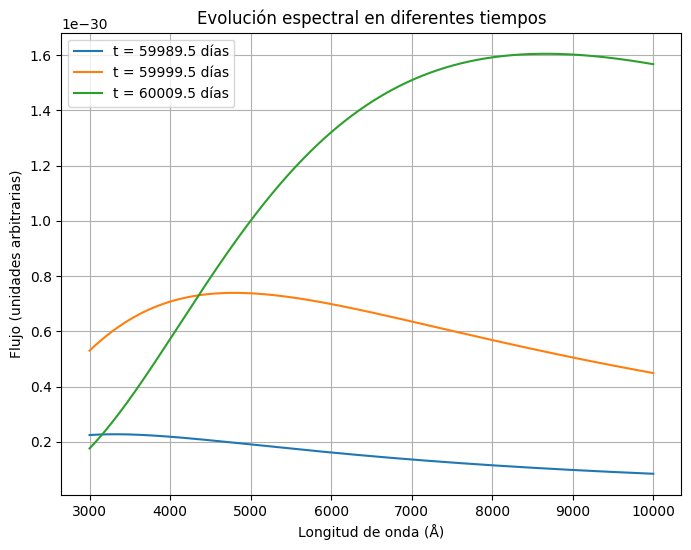

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros obtenidos del ajuste con RainbowFit
reference_time = 59999.53249260742
amplitude = 1.5024966095205689e-15
rise_time = 6.006140070623101
fall_time = 29.7080602136364
Tmin = 5004.566495354728
Tmax = 16283.08283135502
t_color = 4.0627991475796135

# Definir el rango de longitudes de onda (en Angstrom)
wave_aa = np.linspace(3000, 10000, 500)  # Desde 3000Å a 10000Å

# Elegir diferentes tiempos para ver la evolución espectral
times = [reference_time - 10, reference_time, reference_time + 10]  # 10 días antes, en el pico y 10 días después

plt.figure(figsize=(8, 6))

for t in times:
    # Evolución de la temperatura
    temp = Tmin + (Tmax - Tmin) / (1.0 + np.exp((t - reference_time) / t_color))

    # Evolución del flujo bolométrico
    lum = amplitude * np.exp(-(t - reference_time) / fall_time) / (
        1.0 + np.exp(-(t - reference_time) / rise_time))

    # Calcular el espectro para este tiempo
    flux = np.pi * bb_nu(wave_aa, temp) / (5.67e-5 * temp**4) * lum

    # Graficar el espectro
    plt.plot(wave_aa, flux, label=f't = {t:.1f} días')

# Personalizar la gráfica
plt.xlabel("Longitud de onda (Å)")
plt.ylabel("Flujo (unidades arbitrarias)")
plt.legend()
plt.title("Evolución espectral en diferentes tiempos")
plt.grid(True)
plt.show()